In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint
import numpy as np
from random import gauss

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))

# Use coordinated colors. These are the "Tableau 20" colors as
# RGB. Each pair is strong/light. For a theory of color
tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
             (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
             (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
             (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
             (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
             (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
             (227, 119, 194), (247, 182, 210), # pink        [12,13]
             (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
             (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
             (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
             (127, 127, 127), (143, 135, 130), # gray        [20,21]
             (165, 172, 175), (199, 199, 199), # gray        [22,23]
             (207, 207, 207)]                   # gray        [24]
# Scale the RGB values to the [0, 1] range, which is the format
# matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (round(r/255.,1), round(g/255.,1), round(b/255.,1))


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
filenames = ['../Data/heft/HeteroResources_StHeteroCampaignsHEFT.csv',
             '../Data/l2ff/HeteroResources_StHeteroCampaignsL2FF.csv',
             '../Data/random/HeteroResources_StHeteroCampaignsRAND.csv',
             '../Data/ga/perc_100/HeteroResources_StHeteroCampaignsGA.csv',
             '../Data/ga/perc_075/HeteroResources_StHeteroCampaignsGA25.csv',
             '../Data/ga/perc_050/HeteroResources_StHeteroCampaignsGA50.csv']

heft_data = pd.read_csv(filenames[0])
heft_plan = eval(heft_data['plan'][599])

In [3]:
l2ff_data = pd.read_csv(filenames[1])
l2ff_plan = eval(l2ff_data['plan'][599])

In [4]:
random_data = pd.read_csv(filenames[2])
random_plan = eval(random_data[random_data['size'] == 128][random_data.makespan == random_data.makespan.min()]['plan'].item())

In [5]:
ga_data = pd.read_csv(filenames[3])
ga_plan = eval(ga_data[ga_data['size'] == 128][ga_data.makespan == ga_data[ga_data['size'] == 128].makespan.min()]['plan'].item())

In [6]:
ga25_data = pd.read_csv(filenames[4])
ga25_plan = eval(ga25_data[ga25_data['size'] == 128][ga25_data.makespan == ga25_data[ga25_data['size'] == 128].makespan.min()]['plan'].item())

In [7]:
ga50_data = pd.read_csv(filenames[5])
ga50_plan = eval(ga50_data[ga50_data['size'] == 128][ga50_data.makespan == ga50_data[ga50_data['size'] == 128].makespan.min()]['plan'].item())

In [8]:
def get_util(curr_plan, num_resources=4):
    '''
    Calculate makespan
    '''

    resource_usage = [0] * num_resources
    total_num_work = [0] * num_resources
    for placement in curr_plan:
        workflow = placement[0]
        resource_id = placement[1]['id']
        resource_usage[resource_id - 1] = max(resource_usage[resource_id - 1], placement[-1])
        total_num_work[resource_id - 1] += 1
        
    resource_usage = resource_usage[::4] + resource_usage[1::4] + resource_usage[2::4] + resource_usage[3::4]
    resource_usage = [x / max(resource_usage) for x in resource_usage]
    total_num_work = total_num_work[::4] + total_num_work[1::4] + total_num_work[2::4] + total_num_work[3::4]
    return resource_usage, total_num_work

In [9]:
heft_util, heft_work = get_util(heft_plan, 128)
l2ff_util, l2ff_work = get_util(l2ff_plan, 128)
ga_util, ga_work = get_util(ga_plan, 128)
ga25_util, ga25_work = get_util(ga25_plan, 128)
ga50_util, ga50_work = get_util(ga50_plan, 128)
random_util, random_work = get_util(random_plan, 128)

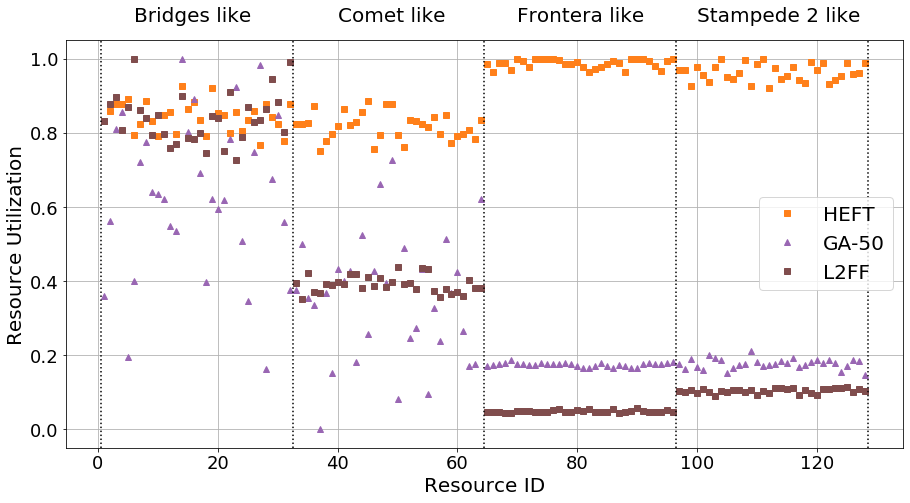

In [10]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
#_ = axis.plot(range(1, 129), random_util, color=tableau20[0], marker='o',label='Random',linewidth=0)
_ = axis.plot(range(1, 129), heft_util,   color=tableau20[2], marker='s',label='HEFT',linewidth=0)
#_ = axis.plot(range(1, 129), ga_util,     color=tableau20[4], marker='^',label='GA',linewidth=0)
#_ = axis.plot(range(1, 129), ga25_util,   color=tableau20[6], marker='^',label='GA-25',linewidth=0)
_ = axis.plot(range(1, 129), ga50_util,   color=tableau20[8], marker='^',label='GA-50',linewidth=0)
_ = axis.plot(range(1, 129), l2ff_util,   color=tableau20[10], marker='s',label='L2FF',linewidth=0)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
# _ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Resource Utilization',fontsize=20)
_ = axis.set_xlabel('Resource ID',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(np.around(axis.get_yticks().tolist(), decimals=2),fontsize=18)
_ = axis.grid('on')
#_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non static homogeneous resources', fontsize=22)
_ = axis.text(6, 1.1, 'Bridges like', fontsize=20)
_ = axis.text(40, 1.1, 'Comet like', fontsize=20)
_ = axis.text(70, 1.1, 'Frontera like', fontsize=20)
_ = axis.text(100, 1.1, 'Stampede 2 like', fontsize=20)
_ = axis.axvline(x=0.5, ymin=0, ymax=1.0, linestyle=':', color='black')
_ = axis.axvline(x=32.5, ymin=0, ymax=1.0, linestyle=':', color='black')
_ = axis.axvline(x=64.5, ymin=0, ymax=1.0, linestyle=':', color='black')
_ = axis.axvline(x=96.5, ymin=0, ymax=1.0, linestyle=':', color='black')
_ = axis.axvline(x=128.5, ymin=0, ymax=1.0, linestyle=':', color='black')
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/HeteroResources_StHeteroCampaigns_Utils.pdf',bbox_inches='tight')
#fig.savefig('StHomoCampaigns_4StHomoResources.pdf',bbox_inches='tight')

In [11]:
filenames = ['../Data/heft/SpHeteroResources_StHeteroCampaignsHEFT.csv',
             '../Data/ga/perc_050/SpHeteroResources_StHeteroCampaignsGA50.csv',
             '../Data/ga/perc_025/SpHeteroResources_StHeteroCampaignsGA75.csv']

heft_data = pd.read_csv(filenames[0])
heft_plan = eval(heft_data['plan'][599])

ga50_data = pd.read_csv(filenames[1])
ga50_plan = eval(ga50_data[ga50_data['size'] == 128][ga50_data.makespan == ga50_data.makespan.min()]['plan'].item())

ga75_data = pd.read_csv(filenames[2])
ga75_plan = eval(ga75_data[ga75_data['size'] == 128][ga75_data.makespan == ga75_data.makespan.min()]['plan'].item())

heft_util, heft_work = get_util(heft_plan, 128)
ga50_util, ga50_work = get_util(ga50_plan, 128)
ga75_util, ga75_work = get_util(ga75_plan, 128)

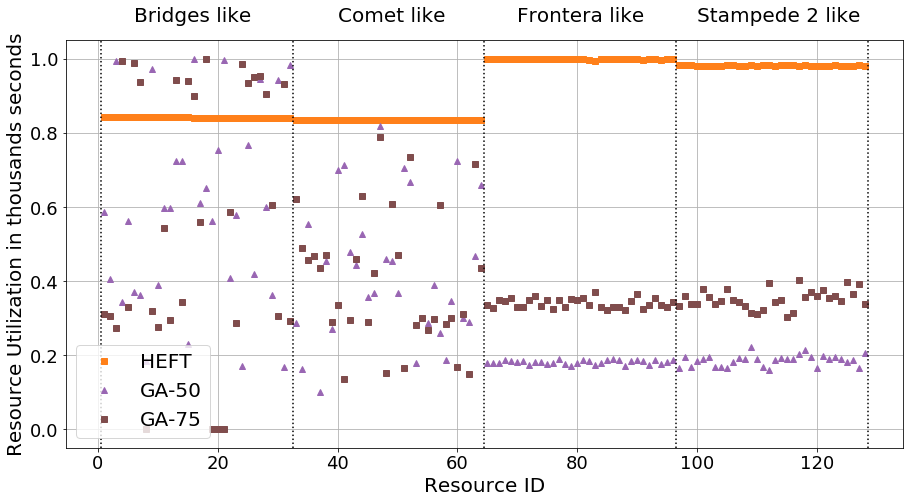

In [12]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
#_ = axis.plot(range(1, 129), random_util, color=tableau20[0], marker='o',label='Random',linewidth=0)
_ = axis.plot(range(1, 129), heft_util,   color=tableau20[2], marker='s',label='HEFT',linewidth=0)
#_ = axis.plot(range(1, 129), ga_util,     color=tableau20[4], marker='^',label='GA',linewidth=0)
#_ = axis.plot(range(1, 129), ga25_util,   color=tableau20[6], marker='^',label='GA-25',linewidth=0)
_ = axis.plot(range(1, 129), ga50_util,   color=tableau20[8], marker='^',label='GA-50',linewidth=0)
_ = axis.plot(range(1, 129), ga75_util,   color=tableau20[10], marker='s',label='GA-75',linewidth=0)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
# _ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Resource Utilization in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Resource ID',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(np.around(axis.get_yticks().tolist(), decimals=2),fontsize=18)
_ = axis.grid('on')
#_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non static homogeneous resources', fontsize=22)
_ = axis.text(6, 1.1, 'Bridges like', fontsize=20)
_ = axis.text(40, 1.1, 'Comet like', fontsize=20)
_ = axis.text(70, 1.1, 'Frontera like', fontsize=20)
_ = axis.text(100, 1.1, 'Stampede 2 like', fontsize=20)
_ = axis.axvline(x=0.5, ymin=0, ymax=1, linestyle=':', color='black')
_ = axis.axvline(x=32.5, ymin=0, ymax=1, linestyle=':', color='black')
_ = axis.axvline(x=64.5, ymin=0, ymax=1, linestyle=':', color='black')
_ = axis.axvline(x=96.5, ymin=0, ymax=1, linestyle=':', color='black')
_ = axis.axvline(x=128.5, ymin=0, ymax=1, linestyle=':', color='black')
_ = axis.legend(fontsize=20)
#fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')
#fig.savefig('StHomoCampaigns_4StHomoResources.pdf',bbox_inches='tight')